In [139]:
import pandas as pd
import numpy as np
from scipy import stats # for statistics like t-tests
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns # for making plots with seaborn
from matplotlib.ticker import FuncFormatter

In [2]:
# Import data (for Mac the "\\" might be replaced by "/")
cwd = os.getcwd()
data = pd.read_csv(cwd + "\\WA_Fn-UseC_-Sales-Win-Loss.csv", index_col = 0)

In [3]:
data.head()

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


Start by formatting variable names:

In [4]:
# Format variable names
names = list(data.columns)

for i in range(len(names)):
    names[i] = names[i].replace(" ", "")
    
# Rename selected variables
indeces = [
    4, 7, 8, 9,
    10, 11, 12, 
    14, 15, 16
    ]

names_update = [
    "DaysSales", "DaysClosing", "DaysQualified", "OpportunityAmount",
    "ClientRevenue", "ClientEmployees", "PastRevenue",
    "IdentifiedDaysRatio", "ValidatedDaysRatio", "QualifiedDaysRatio"
    ]

for ind, i in zip(indeces, range(len(indeces))):
    names[ind] = names_update[i]
    
data.columns = names

In [5]:
data.head()

,SuppliesSubgroup,SuppliesGroup,Region,RouteToMarket,DaysSales,OpportunityResult,SalesStageChangeCount,DaysClosing,DaysQualified,OpportunityAmount,ClientRevenue,ClientEmployees,PastRevenue,CompetitorType,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio,DealSizeCategory
Opportunity Number,,,,,,,,,,,,,,,,,,
1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4


### Some Univarate Plots

First, let's take a look at the opportunity amount won and lost:

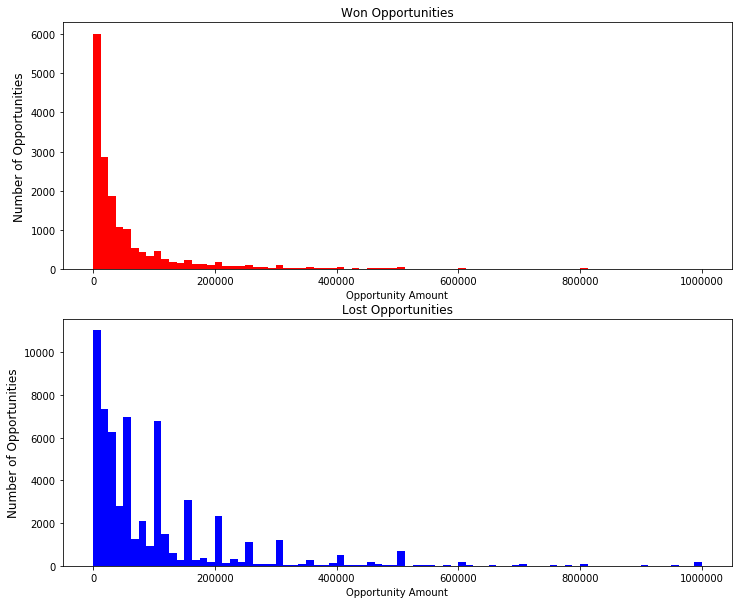

In [6]:
# Plot the distribution of Opportunity amount per Won/lost
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].hist(data[data["OpportunityResult"] == "Won"]["OpportunityAmount"], bins = 80, color = "r")
axs[0].set_title("Won Opportunities")
axs[0].set_ylabel("Number of Opportunities", size = 12)
axs[0].set_xlabel("Opportunity Amount")

axs[1].hist(data[data["OpportunityResult"] == "Loss"]["OpportunityAmount"], bins = 80, color = "b")
axs[1].set_title("Lost Opportunities")
axs[1].set_ylabel("Number of Opportunities", size = 12)
axs[1].set_xlabel("Opportunity Amount")

# axs = axs.ravel()
# for i in range(10):
#     axs[i].hist(lb[lb.CompetitionId == top.iloc[i, 0]].Cost, bins = 80)
#     axs[i].set_title(str(top.iloc[i, 1]))
#     axs[i].tick_params(axis='both', which='both', labelbottom=True)
#     axs[i].set_ylabel("Frequency", size = 12)
#     axs[i].set_xlabel("Cost")
plt.show()

Note that in the diagram above, the y-scales are not equal. To gain more insight on which opportunities are won depending on the opportunity amount, see the next chart:

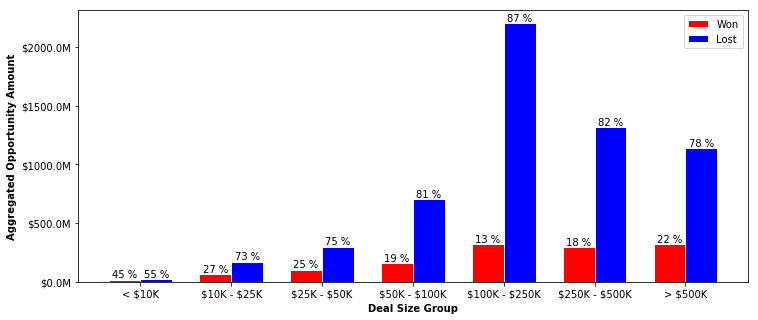

In [292]:
# Plot grouped bar chart for Opportunity Amount

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "DealSizeCategory"])["OpportunityAmount"].sum()["Won"]
lost = data.groupby(["OpportunityResult", "DealSizeCategory"])["OpportunityAmount"].sum()["Loss"]

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
bars_won = ax.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
bars_lost = ax.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = ["< $10K", "\$10K - $25K", "\$25K - $50K", "\$50K - $100K", "\$100K - $250K", "\$250K - $500K", "> $500K"]
plt.xlabel("Deal Size Group", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Aggregated Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Attach a text label above each won bar showing the percentage of won cases in each group
def perc_won(won):
    for i in range(len(won)):
        ax.text(r1[i],
                won[i+1],
                s = str(int(round(won[i + 1] / (won[i + 1] + lost[i + 1]) * 100, 0))) + " %",
                ha='center', va='bottom')
perc_won(won)

# Attach a text label above lost bar showing the percentage of lost cases in each group
def per_lost(lost):
    for i in range(len(lost)):
        ax.text(r2[i],
                lost[i+1],
                s = str(int(round(lost[i + 1] / (won[i + 1] + lost[i + 1]) * 100, 0))) + " %",
                ha='center', va='bottom')      
per_lost(lost)

# Create legend & Show graphic
plt.legend()
plt.show()

Now we can see that most of the opportunities the company is able to win are those with low deal size (below \$ 50K) and some of the largest deals with a volume of more than \$ 500K. Nevertheless, most value lies within the medium sized deals with a volume between \$ 50K and \$ 250 K where the company performs worst.

*Comment: Maybe convert the diagram above to a stacked bar diagramm. This way, the overall amount of opportunity per group would become more clear.*

The next diagramm is more experimental and probably useless:

Text(0,0.5,'Percentage')

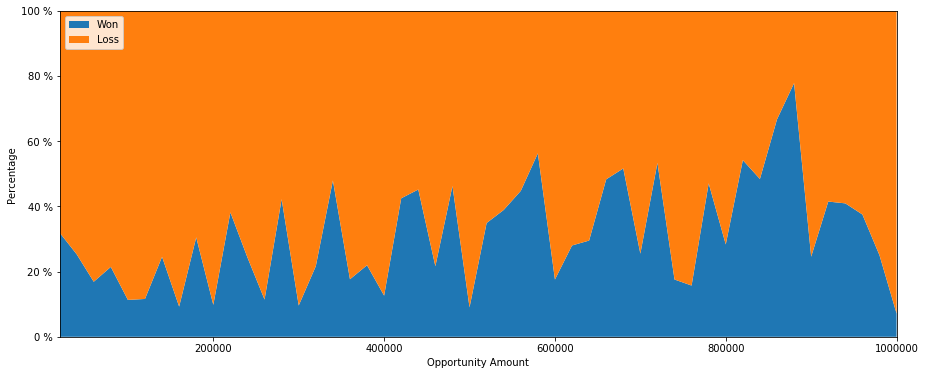

In [51]:
# Plot how many opportunities are won base on the opportunity amount

# Create Data for area plot

# Split Opportunity Amount Data into Groups of 20k
splits = 50
bins = np.linspace(0, 1000000, splits)
data["OpportunityAmountGroup"] = np.digitize(data.OpportunityAmount, bins)

# Sum up number of Opportunities won and lost per Group of 20k
temp = data.groupby(["OpportunityResult", "OpportunityAmountGroup"])["Region"].count()
temp = temp.reset_index()
temp.columns.values[-1] = "Outcome"

# Store opportunities won and lost in seperate objects
temp_loss = temp[:splits]
temp_loss.columns.values[-1] = "Loss"
temp_loss = temp_loss.iloc[:, 1:3]

temp_won = temp[splits:len(temp)]
temp_won.columns.values[-1] = "Won"
temp_won = temp_won.iloc[:, 1:3]

# New object with seperate columns for opportunities won and lost
area_plot_data = pd.merge(temp_loss, temp_won,
               left_on = "OpportunityAmountGroup", right_on = "OpportunityAmountGroup",
               how = "left")

area_plot_data.columns = [["OpportunityAmountGroup", "Loss", "Won"]]

# Compute percentage of opportunities won and lost per group
area_plot_data["NumberOpportunities"] = area_plot_data[['Won', 'Loss']].sum(axis=1)

loss_i = []
won_i = []
loss = []
won = []
for i in range(len(area_plot_data)):
    loss_i = area_plot_data.iloc[i, 1] / area_plot_data.iloc[i, 3]
    won_i = area_plot_data.iloc[i, 2] /area_plot_data.iloc[i, 3]
    loss.append(loss_i)
    won.append(won_i)
    
# Make a stacked area plot
fig, axs = plt.subplots(figsize = (15, 6))
axs.stackplot(range(1,(splits + 1)), won, loss, labels=["Won", "Loss"])
axs.legend(loc='upper left')
axs.set_xticklabels(["0", "200000", "400000", "600000", "800000", "1000000"])
axs.set_yticklabels(["0 %", "20 %", "40 %", "60 %", "80 %", "100 %"])
axs.margins(0,0)
axs.set_xlabel("Opportunity Amount")
axs.set_ylabel("Percentage")

As a next step, let's see how the company performs in different regions *(add percentages at each bar at a later time):*

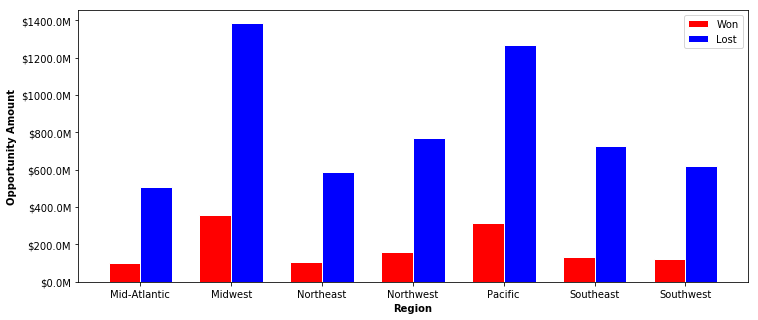

In [296]:
# Plot Opportunities by Region
# Define function for converting dollar values to millions
def millions(x, pos):
    return '$%1.1fM' % (x*1e-6)

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "Region"])["OpportunityAmount"].sum()["Won"]
lost = data.groupby(["OpportunityResult", "Region"])["OpportunityAmount"].sum()["Loss"]

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
bars_won = ax.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
bars_lost = ax.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
regions = list(data["Region"].drop_duplicates().sort_values()) # Get labels
plt.xlabel("Region", fontweight='bold')
plt.xticks((r1+r2)/2, regions)

# Add yaxis label
plt.ylabel("Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Create legend & Show graphic
plt.legend()
plt.show()

Further, inspect how the company performs across different product categories *(also add percentages later on):*

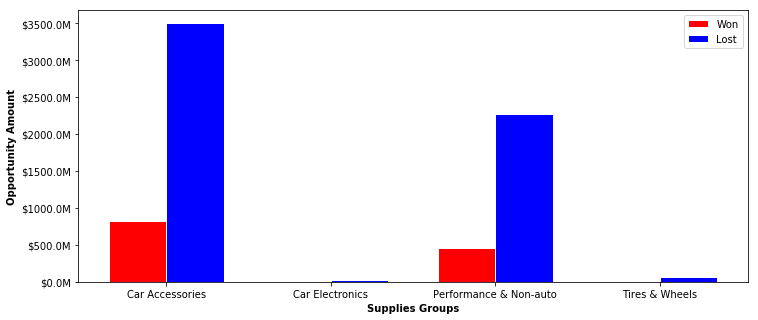

In [136]:
# Plot Opportunities by Category

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "SuppliesGroup"])["OpportunityAmount"].sum()["Won"]
lost = data.groupby(["OpportunityResult", "SuppliesGroup"])["OpportunityAmount"].sum()["Loss"]

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
plt.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
plt.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = list(data["SuppliesGroup"].drop_duplicates().sort_values()) # Get labels
plt.xlabel("Supplies Groups", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Create legend & Show graphic
plt.legend()
plt.show()

Car accessories are by far the most important supplies category. Therefore, let's take a look at its subcategories:

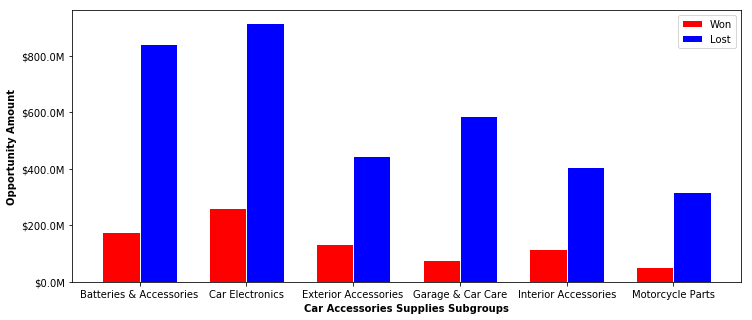

In [297]:
# Plot Subgroups for Car Accessories supplies

# Set bar width
width = 0.35

# Set bar heights
won = data[data.SuppliesGroup == "Car Accessories"].groupby(
    ["OpportunityResult", "SuppliesSubgroup"])["OpportunityAmount"].sum()["Won"]

lost = data[data.SuppliesGroup == "Car Accessories"].groupby(
    ["OpportunityResult", "SuppliesSubgroup"])["OpportunityAmount"].sum()["Loss"]

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
plt.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
plt.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = list(data["SuppliesSubgroup"].drop_duplicates().sort_values()) # Get labels
plt.xlabel("Car Accessories Supplies Subgroups", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Create legend & Show graphic
plt.legend()
plt.show()

Next, analyze sales chanels:

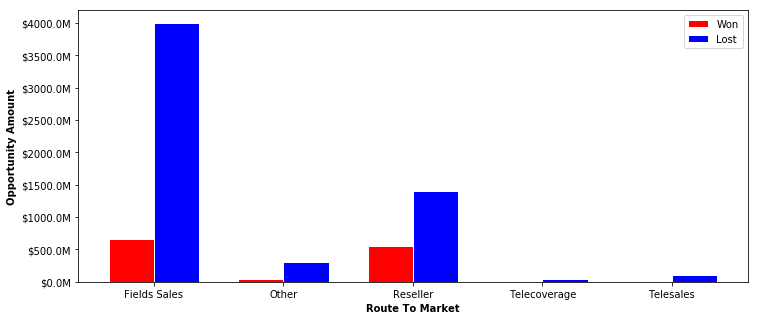

In [137]:
# Plot Opportunities by Route to Market

# Set bar width
width = 0.35

# Set bar heights
won = data.groupby(["OpportunityResult", "RouteToMarket"])["OpportunityAmount"].sum()["Won"]
lost = data.groupby(["OpportunityResult", "RouteToMarket"])["OpportunityAmount"].sum()["Loss"]

# Set position of bars on X axis
r1 = np.arange(len(won))
r2 = [x + width for x in r1]

# Make the plot
f, ax = plt.subplots(figsize=(12,5))
plt.bar(r1, won, color = "r", width = width, edgecolor = 'white', label = 'Won')
plt.bar(r2, lost, color = "b", width = width, edgecolor = 'white', label = 'Lost')

# Add xticks and labels
groups = list(data["RouteToMarket"].drop_duplicates().sort_values()) # Get labels
plt.xlabel("Route To Market", fontweight='bold')
plt.xticks((r1+r2)/2, groups)

# Add yaxis label
plt.ylabel("Opportunity Amount", fontweight = "bold")

# Convert yticks to millions
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Create legend & Show graphic
plt.legend()
plt.show()

Finally, analyze how the input parameters correlate: <br>
*Note that I am not sure, if it makes sense to look at correlations of "quasi-numerical" features like past revenues. Originally this feature was on a metric scale but as the data now is coded as groups (0 = 0, 1 = \[1, 50K\] etc.) it is actually on an ordinal scale, meaning that we probably should not use Pearson's correlation coefficient (which is called by df.corr) but rather Spearman Rank Correlation, Crammer V or the like.*

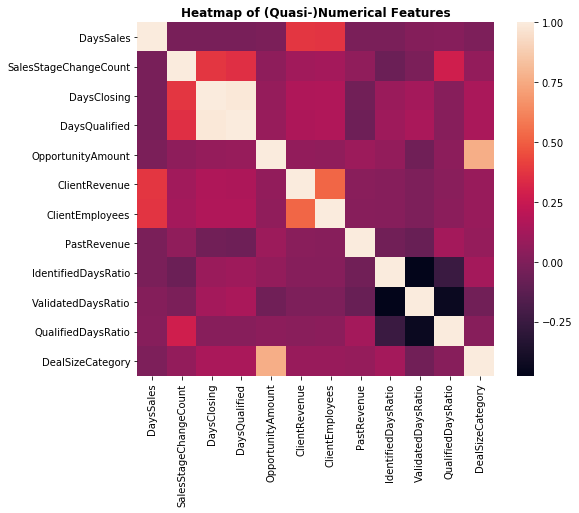

In [155]:
# Plot a heatmap of correlations

# Calculate the correlation matrix
corr = data.drop("OpportunityAmountGroup", axis = 1).corr()

# Plot the heatmap
fig, ax = plt.subplots(figsize=(8,6.5))
sns.heatmap(
    corr,
    xticklabels = corr.columns,
    yticklabels = corr.columns
    )
plt.title("Heatmap of (Quasi-)Numerical Features", fontweight = "bold")
plt.show()


In [43]:
data.groupby("OpportunityResult").mean()

,DaysSales,SalesStageChangeCount,DaysClosing,DaysQualified,OpportunityAmountUSD,ClientRevenue,ClientEmployees,PastRevenue,IdentifiedDaysRatio,ValidatedDaysRatio,QualifiedDaysRatio,DealSizeCategory
OpportunityResult,,,,,,,,,,,,
Loss,43.833206,2.881304,19.104060,18.831683,97087.496043,1.632057,1.616775,0.163731,0.242780,0.530005,0.146787,3.608845
Won,42.780337,3.210756,8.588132,7.688830,72962.312589,1.580814,1.560447,0.781472,0.066975,0.345461,0.316146,2.847053
